In [5]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [6]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('STB.csv')
#df1=df.reset_index()['Price']
df=df.reset_index()['Price']
df

0       11750
1       12550
2       12900
3       13300
4       13000
        ...  
1237    27000
1238    27400
1239    27000
1240    27200
1241    27850
Name: Price, Length: 1242, dtype: int64

In [7]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [9]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [12]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 500ms/step - loss: 0.0370 - val_loss: 0.0102
Epoch 2/100
12/12 [==============================] - 3s 270ms/step - loss: 0.0075 - val_loss: 0.0296
Epoch 3/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0030 - val_loss: 0.0155
Epoch 4/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0020 - val_loss: 0.0084
Epoch 5/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0017 - val_loss: 0.0077
Epoch 6/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0016 - val_loss: 0.0107
Epoch 7/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0015 - val_loss: 0.0100
Epoch 8/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0015 - val_loss: 0.0090
Epoch 9/100
12/12 [==============================] - 3s 255ms/step - loss: 0.0015 - val_loss: 0.0057
Epoch 10/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0015 - val_l

12/12 [==============================] - 3s 254ms/step - loss: 4.9050e-04 - val_loss: 0.0023
Epoch 80/100
12/12 [==============================] - 3s 254ms/step - loss: 4.5718e-04 - val_loss: 0.0016
Epoch 81/100
12/12 [==============================] - 3s 255ms/step - loss: 4.9169e-04 - val_loss: 0.0013
Epoch 82/100
12/12 [==============================] - 3s 255ms/step - loss: 6.1187e-04 - val_loss: 0.0024
Epoch 83/100
12/12 [==============================] - 3s 253ms/step - loss: 5.2039e-04 - val_loss: 0.0014
Epoch 84/100
12/12 [==============================] - 3s 254ms/step - loss: 5.4068e-04 - val_loss: 0.0020
Epoch 85/100
12/12 [==============================] - 3s 257ms/step - loss: 4.4470e-04 - val_loss: 0.0016
Epoch 86/100
12/12 [==============================] - 3s 255ms/step - loss: 4.6915e-04 - val_loss: 0.0020
Epoch 87/100
12/12 [==============================] - 3s 255ms/step - loss: 4.5973e-04 - val_loss: 0.0016
Epoch 88/100
12/12 [==============================] - 3s 25

In [14]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 83ms/step


In [15]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [16]:
train_size1 = int(0.7 * len(df))
test_size1 = int(0.2 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [17]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 3543.798407447455
Testing RMSE: 7256.789276210337
Validation MAPE: 11.792965230331099
Testing MAPE: 22.45379592104037
Validation MAE: 2473.2860572916666
Testing MAE: 5905.524916755387


In [18]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=65
i=0
while(i<30):

    if(len(temp_input)>65):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.7178322]
66
1 day input [0.58143608 0.59894921 0.64448336 0.63222417 0.60945709 0.61996497
 0.59544658 0.5709282  0.57618214 0.63397548 0.64098074 0.61996497
 0.61646235 0.61996497 0.63222417 0.67250438 0.65499124 0.61996497
 0.59894921 0.63222417 0.60595447 0.62171629 0.59194396 0.60595447
 0.61295972 0.61996497 0.62171629 0.63747811 0.63397548 0.63222417
 0.65499124 0.6619965  0.68126095 0.68651489 0.66374781 0.64273205
 0.65499124 0.65323993 0.65323993 0.65849387 0.67075306 0.64448336
 0.65148862 0.65148862 0.63747811 0.64448336 0.64098074 0.63922942
 0.62171629 0.63397548 0.62521891 0.63047285 0.62521891 0.61821366
 0.64273205 0.64623468 0.66725044 0.66900175 0.68301226 0.69001751
 0.70402802 0.69001751 0.69702277 0.71978984 0.71783221]
1 day output [[0.72465765]]
2 day input [0.59894921 0.64448336 0.63222417 0.60945709 0.61996497 0.59544658
 0.5709282  0.57618214 0.63397548 0.64098074 0.61996497 0.61646235
 0.61996497 0.63222417 0.67250438 0.65499124 0.61996497 0.59894921
 0.63

11 day output [[0.7801253]]
12 day input [0.61996497 0.61646235 0.61996497 0.63222417 0.67250438 0.65499124
 0.61996497 0.59894921 0.63222417 0.60595447 0.62171629 0.59194396
 0.60595447 0.61295972 0.61996497 0.62171629 0.63747811 0.63397548
 0.63222417 0.65499124 0.6619965  0.68126095 0.68651489 0.66374781
 0.64273205 0.65499124 0.65323993 0.65323993 0.65849387 0.67075306
 0.64448336 0.65148862 0.65148862 0.63747811 0.64448336 0.64098074
 0.63922942 0.62171629 0.63397548 0.62521891 0.63047285 0.62521891
 0.61821366 0.64273205 0.64623468 0.66725044 0.66900175 0.68301226
 0.69001751 0.70402802 0.69001751 0.69702277 0.71978984 0.71783221
 0.72465765 0.731628   0.73825133 0.74450165 0.75042129 0.75604212
 0.76138389 0.76644969 0.77124989 0.775801   0.78012532]
12 day output [[0.78422487]]
13 day input [0.61646235 0.61996497 0.63222417 0.67250438 0.65499124 0.61996497
 0.59894921 0.63222417 0.60595447 0.62171629 0.59194396 0.60595447
 0.61295972 0.61996497 0.62171629 0.63747811 0.63397548 

23 day output [[0.814489]]
24 day input [0.60595447 0.61295972 0.61996497 0.62171629 0.63747811 0.63397548
 0.63222417 0.65499124 0.6619965  0.68126095 0.68651489 0.66374781
 0.64273205 0.65499124 0.65323993 0.65323993 0.65849387 0.67075306
 0.64448336 0.65148862 0.65148862 0.63747811 0.64448336 0.64098074
 0.63922942 0.62171629 0.63397548 0.62521891 0.63047285 0.62521891
 0.61821366 0.64273205 0.64623468 0.66725044 0.66900175 0.68301226
 0.69001751 0.70402802 0.69001751 0.69702277 0.71978984 0.71783221
 0.72465765 0.731628   0.73825133 0.74450165 0.75042129 0.75604212
 0.76138389 0.76644969 0.77124989 0.775801   0.78012532 0.78422487
 0.78810346 0.79176742 0.79521739 0.79845124 0.80146998 0.80425566
 0.80679846 0.80909353 0.81114662 0.81294155 0.81448901]
24 day output [[0.81578106]]
25 day input [0.61295972 0.61996497 0.62171629 0.63747811 0.63397548 0.63222417
 0.65499124 0.6619965  0.68126095 0.68651489 0.66374781 0.64273205
 0.65499124 0.65323993 0.65323993 0.65849387 0.67075306 0

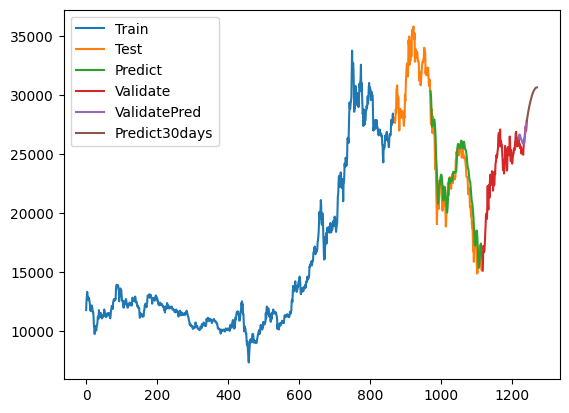

In [19]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()